# Sensitivity Analysis by using different time steps in best models.

In [2]:
import pandas as pd
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.models import Sequential
from keras.layers import Dense
 

# ConvLSTM

### Diamond Harbour

In [3]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [4,6,8,10]:
    for w in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, 1, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_step2, n_features)))
        model.add(Flatten())
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_step1)

        x_input = x_input.reshape((x_input.shape[0], n_seq,1, n_step2, n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

       
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Convlstm_DH_sensitivity'+'n_step_.csv', index=None)

### Malancha

In [4]:
from numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [4,6,8,10]:
    for w in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, 1, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_step2, n_features)))
        model.add(Flatten())
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_step1)
        x_input = x_input.reshape((x_input.shape[0], n_seq,1, n_step2, n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

       
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Convlstm_M_sensitivity'+'n_step_.csv', index=None)

### Raidighi

In [5]:
### Raidighifrom numpy import array
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import ConvLSTM2D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [4,6,8,10]:
    for w in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, timesteps, rows, columns, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, 1, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(ConvLSTM2D(filters=64, kernel_size=(1,2), activation='relu', input_shape=(n_seq, 1, n_step2, n_features)))
        model.add(Flatten())
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_step1)

        x_input = x_input.reshape((x_input.shape[0], n_seq,1, n_step2, n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)

        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

       
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Convlstm_R_sensitivity'+'n_step_.csv', index=None)

# Vanilla LSTM

### Diamond Harbour

In [6]:
# univariate lstm example
### Diamond Harbourfrom numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Embedding
import numpy as np
import pandas as pd
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3,5,7,9]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))

        # choose a number of time steps
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)

        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()

        model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
        model.add(Dense(1))
       
        # compile model
        model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        # fit model

        history=model.fit(X, y, epochs=200, verbose=0)
        
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
   
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Vanillalstm_DH_sensitivity'+'n_step_.csv', index=None)

### Malancha

In [7]:
# univariate lstm example
from numpy import array
from keras.models import Sequential
### Malanchafrom keras.layers import LSTM
from keras.layers import Dense, Embedding
import numpy as np
import pandas as pd
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3,5,7,9]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))

        # choose a number of time steps
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)

        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()

        model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        #model.compile(optimizer='adam', loss='mse')
        # compile model
        model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        # fit model

        history=model.fit(X, y, epochs=200, verbose=0)
        
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
      
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Vanillalstm_M_sensitivity'+'n_step_.csv', index=None)

### Raidighi

In [8]:
### Raidighi# univariate lstm example
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense, Embedding
import numpy as np
import pandas as pd
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3,5,7,9]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))

        # choose a number of time steps
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)

        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()

        model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        
        # compile model
        model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])
        # fit model

        history=model.fit(X, y, epochs=200, verbose=0)
        
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)

        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta

        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Vanillalstm_R_sensitivity'+'n_step_.csv', index=None)

# Stacked LSTM

### Diamond Harbour

In [9]:
### Diamond Harbourfrom numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3,5,7,9]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

    
        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
     
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Stackedlstm_DH_sensitivity'+'n_step_.csv', index=None)

### Malancha

In [10]:
### Malanchafrom numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3,5,7,9]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)

        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Stackedlstm_M_sensitivity'+'n_step_.csv', index=None)

### Raidighi

In [11]:
### Raidighifrom numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3,5,7,9]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction
        # split into samples
        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
    
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Stackedlstm_R_sensitivity'+'n_step_.csv', index=None)

# Bidirectional LSTM

### Diamond Harbour

In [12]:
### Diamond Harbourfrom numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3,5,7,9]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_steps)

      
        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

        #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
  
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Bidirectional_DH_sensitivity'+'n_step_.csv', index=None)

### Malancha

In [13]:
### Malanchafrom numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3,5,7,9]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_steps)

       
        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

         #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)

        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Bidirectional_M_sensitivity'+'n_step_.csv', index=None)

### Raidighi

In [14]:
### Raidighifrom numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Bidirectional
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [3,5,7,9]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        n_steps = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_steps)
        # reshape from [samples, timesteps] into [samples, timesteps, features]
        n_features = 1
        X = X.reshape((X.shape[0], X.shape[1], n_features))
        # define model
        model = Sequential()
        model.add(Bidirectional(LSTM(50, activation='relu'), input_shape=(n_steps, n_features)))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=200, verbose=0)
        # demonstrate prediction

        x_input, y_input = split_sequence(test_data.Value, n_steps)

        x_input = x_input.reshape((x_input.shape[0], x_input.shape[1], n_features))

         #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
   
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('Bidirectional_R_sensitivity'+'n_step_.csv', index=None)

# CNN LSTM

### Diamond Harbour

In [15]:
### Diamond Harbourfrom numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [4,6,8,10]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet1')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        
        
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_step2, n_features)))
        model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
        model.add(TimeDistributed(Flatten()))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction
        x_input, y_input = split_sequence(test_data.Value, n_step1)

        x_input = x_input.reshape((x_input.shape[0], n_seq, n_step2, n_features))

         #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
      
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('CNN_DH_sensitivity'+'n_step_.csv', index=None)

### Malancha

In [16]:
### Malanchafrom numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [4,6,8,10]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet2')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        
        
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_step2, n_features)))
        model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
        model.add(TimeDistributed(Flatten()))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction
        x_input, y_input = split_sequence(test_data.Value, n_step1)

  
        x_input = x_input.reshape((x_input.shape[0], n_seq, n_step2, n_features))

         #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
     
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('CNN_M_sensitivity'+'n_step_.csv', index=None)

### Raidighi

In [17]:
from numpy import array
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
rmse = []
cfu= []
cfl= []
nsteps = []
for j in [4,6,8,10]:
    for i in range(20):
        nsteps.append(j)
        # Defining a function to split a univariate sequence into samples for LSTM Model
        def split_sequence(sequence, n_steps):
            X, y = list(), list()
            for i in range(len(sequence)):
                # find the end of this pattern
                end_ix = i + n_steps
                # check if we are beyond the sequence
                if end_ix > len(sequence)-1:
                    break
                # gather input and output parts of the pattern
                seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
                X.append(seq_x)
                y.append(seq_y)
            return array(X), array(y)

        # define input sequence
        data=pd.read_excel('Chitala_TS.xlsx', sheet_name='Sheet3')

        tdw=pd.Series([2016])
        train_data=data[~data['Year '].isin(tdw)]
        test_data=data[data['Year '].isin(tdw)]
        test_data=test_data.set_index(np.arange(0,len(test_data)))
        
        
        n_step1 = j
        # split into samples
        X, y = split_sequence(train_data.Value, n_step1)
        # reshape from [samples, timesteps] into [samples, subsequences, timesteps, features]
        n_features = 1
        n_seq = 2
        n_step2 = int(n_step1/2)
        X = X.reshape((X.shape[0], n_seq, n_step2, n_features))
        # define model
        model = Sequential()
        model.add(TimeDistributed(Conv1D(filters=64, kernel_size=1, activation='relu'), input_shape=(None, n_step2, n_features)))
        model.add(TimeDistributed(MaxPooling1D(pool_size=2)))
        model.add(TimeDistributed(Flatten()))
        model.add(LSTM(50, activation='relu'))
        model.add(Dense(1))
        model.compile(optimizer='adam', loss='mse')
        # fit model
        model.fit(X, y, epochs=500, verbose=0)
        # demonstrate prediction
        x_input, y_input = split_sequence(test_data.Value, n_step1)

        x_input = x_input.reshape((x_input.shape[0], n_seq, n_step2, n_features))

         #Prediction on Test dataset
        yhat = model.predict(x_input, verbose=0)
       
        yhat=yhat.reshape(-1)

        # Calculating Mean Sum of squared error
        mse=1/len(yhat)*sum(np.square(y_input-yhat))
        mse

        #95% Confidence Interval at alpha=0.05, zalpha/2=1.96
        yhat_b = 1/len(yhat)*sum(yhat)
        ieta = np.sqrt(1/len(yhat)*sum(np.square(yhat-yhat_b)))
        CI_L = yhat_b-1.96*ieta
        CI_U = yhat_b+1.96*ieta

        # Confidence Prediction at each step points
        import matplotlib.pyplot as plt
        y_l=yhat-1.96*ieta
        y_u=yhat+1.96*ieta


        
        print('RMSE',np.sqrt(mse))
        rmse.append(np.sqrt(mse))
        print('Confidence Interval :', CI_L , CI_U)
        cfu.append(CI_U)
        cfl.append(CI_L)
        
result=pd.DataFrame({'RMSE':rmse,'CI_U':cfu,'CI_L':cfl,'nsteps':nsteps})
result.to_csv('CNN_R_sensitivity'+'n_step_.csv', index=None)

In [4]:
site = ['M','R','DH']
i=0
Data=['Convlstm_',
      'Stackedlstm_',
      'Vanillalstm_',
      'Bidirectional_',
      'CNN_']
for j in range(len(Data)):
    for i in range(len(site)):
        file = Data[j] + site[i]+'_sensitivityn_step_.csv'
        

Convlstm_M_sensitivityn_step_.csv
Convlstm_R_sensitivityn_step_.csv
Convlstm_DH_sensitivityn_step_.csv
Stackedlstm_M_sensitivityn_step_.csv
Stackedlstm_R_sensitivityn_step_.csv
Stackedlstm_DH_sensitivityn_step_.csv
Vanillalstm_M_sensitivityn_step_.csv
Vanillalstm_R_sensitivityn_step_.csv
Vanillalstm_DH_sensitivityn_step_.csv
Bidirectional_M_sensitivityn_step_.csv
Bidirectional_R_sensitivityn_step_.csv
Bidirectional_DH_sensitivityn_step_.csv
CNN_M_sensitivityn_step_.csv
CNN_R_sensitivityn_step_.csv
CNN_DH_sensitivityn_step_.csv


### Section 3.2.4 Figure 7 (In manuscript)

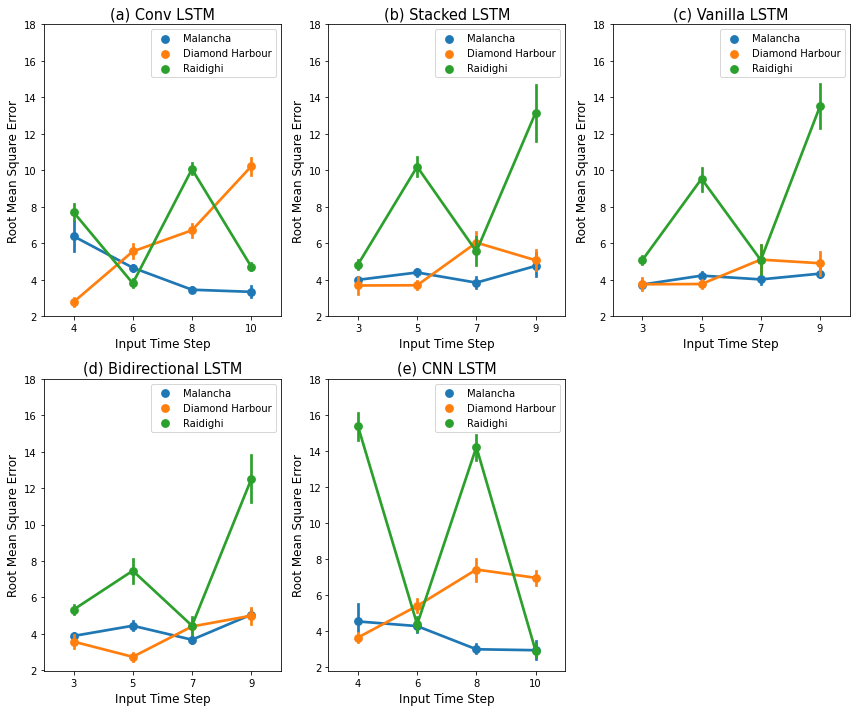

In [58]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np
site = ['M','DH','R']
color = ['red','green','blue']
name = ['Malancha','Diamond Harbour','Raidighi']
title = ['Conv LSTM','Stacked LSTM','Vanilla LSTM','Bidirectional LSTM','CNN LSTM']
img = ['(a)','(b)','(c)','(d)','(e)']
Data=['Convlstm_',
      'Stackedlstm_',
      'Vanillalstm_',
      'Bidirectional_',
      'CNN_']
import warnings 
warnings.filterwarnings(action='ignore')
fig = plt.figure(figsize=(12,10))
for j in range(len(Data)):
    ndata = pd.DataFrame()
    for i in range(len(site)):
        file = Data[j] + site[i]+'_sensitivityn_step_.csv'
        data = pd.read_csv(file)
        data['site']= np.repeat(name[i],len(data))
        ndata = ndata.append(data)
    axes=fig.add_subplot(2, 3, j+1)
    sns.pointplot(data=ndata, x="nsteps", y="RMSE", hue='site', ax=axes)
    axes.set_ylabel('Root Mean Square Error', size=12)
    axes.set_xlabel('Input Time Step', size=12)
    axes.set_title(img[j]+' '+title[j], size=14.5)
    axes.legend(loc='best', fontsize=10)
    plt.yticks([2,4,6,8,10,12,14,16,18])
plt.tight_layout()
plt.savefig('Sensitivity_analysis_all.jpg', dpi=400)
plt.show()